In [2]:
import json
import tensorflow as tf
import matplotlib.pyplot as plt
import io
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Define parameters

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

### Download the dataset

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-08-27 18:52:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-08-27 18:52:14 (108 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [5]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Preprocess

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, 
                      oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type, 
                                truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen=max_length,
                               padding=padding_type, 
                               truncating=trunc_type)

In [9]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### Model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6614 - accuracy: 0.5953 - val_loss: 0.5723 - val_accuracy: 0.8123
Epoch 2/30
625/625 - 3s - loss: 0.4265 - accuracy: 0.8358 - val_loss: 0.3836 - val_accuracy: 0.8413
Epoch 3/30
625/625 - 3s - loss: 0.3107 - accuracy: 0.8755 - val_loss: 0.3573 - val_accuracy: 0.8460
Epoch 4/30
625/625 - 3s - loss: 0.2597 - accuracy: 0.8980 - val_loss: 0.3591 - val_accuracy: 0.8390
Epoch 5/30
625/625 - 3s - loss: 0.2242 - accuracy: 0.9118 - val_loss: 0.3418 - val_accuracy: 0.8551
Epoch 6/30
625/625 - 3s - loss: 0.1975 - accuracy: 0.9241 - val_loss: 0.3575 - val_accuracy: 0.8493
Epoch 7/30
625/625 - 3s - loss: 0.1745 - accuracy: 0.9355 - val_loss: 0.3620 - val_accuracy: 0.8539
Epoch 8/30
625/625 - 3s - loss: 0.1551 - accuracy: 0.9428 - val_loss: 0.3834 - val_accuracy: 0.8517
Epoch 9/30
625/625 - 3s - loss: 0.1405 - accuracy: 0.9495 - val_loss: 0.4133 - val_accuracy: 0.8408
Epoch 10/30
625/625 - 3s - loss: 0.1277 - accuracy: 0.9546 - val_loss: 0.4212 - val_accuracy: 0.8469

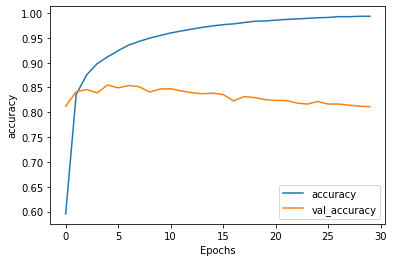

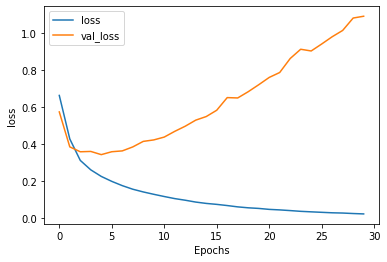

In [13]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

The validation accuracy mantains in a 0.8 level, but the loss increased. This is a common behaviour of text data. Trying to adjust parameters we might increased the accuracy.

Epoch 1/30
625/625 - 3s - loss: 0.5255 - accuracy: 0.7239 - val_loss: 0.3968 - val_accuracy: 0.8241
Epoch 2/30
625/625 - 3s - loss: 0.3422 - accuracy: 0.8518 - val_loss: 0.3701 - val_accuracy: 0.8320
Epoch 3/30
625/625 - 3s - loss: 0.3065 - accuracy: 0.8692 - val_loss: 0.3701 - val_accuracy: 0.8343
Epoch 4/30
625/625 - 3s - loss: 0.2921 - accuracy: 0.8733 - val_loss: 0.3882 - val_accuracy: 0.8281
Epoch 5/30
625/625 - 3s - loss: 0.2838 - accuracy: 0.8771 - val_loss: 0.3849 - val_accuracy: 0.8296
Epoch 6/30
625/625 - 3s - loss: 0.2777 - accuracy: 0.8798 - val_loss: 0.3969 - val_accuracy: 0.8316
Epoch 7/30
625/625 - 3s - loss: 0.2744 - accuracy: 0.8820 - val_loss: 0.3932 - val_accuracy: 0.8313
Epoch 8/30
625/625 - 3s - loss: 0.2714 - accuracy: 0.8834 - val_loss: 0.4000 - val_accuracy: 0.8325
Epoch 9/30
625/625 - 3s - loss: 0.2686 - accuracy: 0.8841 - val_loss: 0.4048 - val_accuracy: 0.8305
Epoch 10/30
625/625 - 3s - loss: 0.2668 - accuracy: 0.8862 - val_loss: 0.4509 - val_accuracy: 0.8092

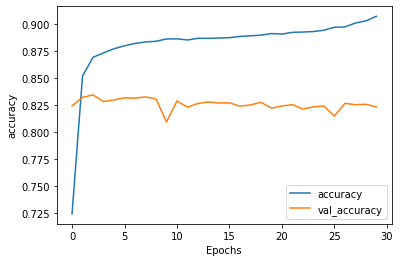

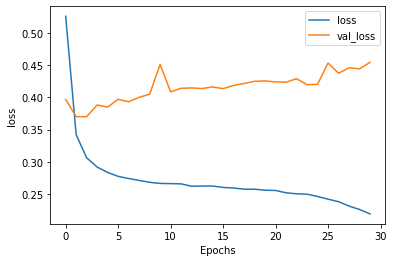

In [25]:
vocab_size = 2500
embedding_dim = 64
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


tokenizer = Tokenizer(num_words=vocab_size, 
                      oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type, 
                                truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen=max_length,
                               padding=padding_type, 
                               truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [26]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.15519515]
 [0.00280154]]
